## **Exploring the Connections Between Emissions, Farming, and Population Growth (1990–2020)**

Over the years, human activities and the environment have been closely linked, shaping the world we know today. Farming practices like growing rice or burning leftover crops release greenhouse gases, fueling global warming. Fires in grasslands and forests add even more to the mix, disrupting ecosystems and affecting the air we breathe. Industries and the energy needed to run farms further increase the strain on the planet.

At the same time, as cities expand and rural communities grow, the demand for food, land, and resources rises, driving up emissions and transforming landscapes. With the planet warming and weather patterns changing, it’s more important than ever to understand how all these pieces connect. From planting crops to transporting food, every action leaves its mark, shaping not just the environment today but also the future we pass on to the next generation.

<div style="text-align: center;">
    <img src="agri_image.png" width="400">
</div>


# Table of Contents
1. [Introduction](#1.Introduction)
   1.1. [Problem Statement](#1.1.Problem-Statement)  
   1.2. [Objectives](#1.2.Objectives)  
2. [Importing Libraries](#2.Importing-Libraries)  
3. [Importing The Dataset](#3.Importing-The-Dataset)    
4. [Data Preprocessing](#4.Data-Preprocessing)  
5. [Exploratory Data Analysis (EDA)](#5.Exploratory-Data-Analysis-(EDA))
6. [Feature Selection](#6.Feature-Selection)
7. [Splitting Data into Training and Test Sets](#7.Splitting-Data-into-Training-and-Test-Sets)  
8. [Model Training](#8.Model-Training)
9. [Model Evaluation](#9.Model-Evaluation)
10. [Conclusion](#10.Conclusion)



### **1.Introduction**

#### *1.1.Problem Statement*

Predicting Temperature Variations

With the use of agricultural emissions and other environmental variables, can a regression model be used to forecast temperature variances?

#### *1.2.Objectives*

### **2.Importing Libraries**

In [1]:
# import all packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

### **3.Importing The Dataset**

In [3]:
# importing the dataset
df = pd.read_csv("co2_emissions_from_agri.csv")
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


### **4.Data Preprocessing**

The data cleaning includes: 

    1. Handling missing values 
    2. Removing any duplicates, in rows
    3. Checking of data types for each column
    4. Filtering the observations with less entries for each Area 

In [4]:
df.columns = df.columns.str.strip()

In [5]:
#Handling missing values 
missing_values = df.isnull().any(axis = 1)
df['Savanna fires'] = df['Savanna fires'].fillna(df['Savanna fires'].mean())
df['Forest fires'] = df['Forest fires'].fillna(df['Forest fires'].mean())
df['Crop Residues'] = df['Crop Residues'].fillna(df['Crop Residues'].mean())
df['Forestland'] = df['Forestland'].fillna(df['Forestland'].mean())
df['Net Forest conversion'] = df['Net Forest conversion'].fillna(df['Net Forest conversion'].mean())
df['Food Household Consumption'] = df['Food Household Consumption'].fillna(df['Food Household Consumption'].mean())
df['IPPU'] = df['IPPU'].fillna(df['IPPU'].mean())
df['Fires in organic soils'] = df['Fires in organic soils'].fillna(df['Fires in organic soils'].mean())
df['On-farm energy use'] = df['On-farm energy use'].fillna(df['On-farm energy use'].mean())
df['Manure applied to Soils'] = df['Manure applied to Soils'].fillna(df['Manure applied to Soils'].mean())
df['Fires in humid tropical forests'] = df['Fires in humid tropical forests'].fillna(df['Fires in humid tropical forests'].mean())

Replace the missing value with the mean of the particular column.

In [6]:
df.columns = df.columns.str.strip()
df['Manure Management'] = df['Manure Management'].fillna(df['Manure Management'].mean())

In [7]:
df_cleaned = df.copy()

In [8]:
#removing any duplicates
df_cleaned.duplicated().sum()

0

There are no duplicates

In [9]:
#checking the data types
df_cleaned.dtypes
#if we need to convert the columns to a different type, we use astype()

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

The data type for each column is well represented, therefore there is no need to change the data type 

In [10]:
#Check the summary of the dataset
df_cleaned.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,...,6965.000000,6965.000000,6965.000000,6965.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5234.597927,3695.155566,3310.818022,17613.825187,15861.445678,1429.159367,5616.748808,78882.488294,9.751121e+04,...,7429.808959,22669.847760,3228.341292,11738.409960,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,25.360100,181.260800,0.000000,6.000000,27.958600,-5960.829600,0.000000e+00,...,52.707800,0.000000,0.000000,17.738200,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.690800,0.646500,193.083100,534.817400,0.000000,13.000000,204.962800,-128.411600,1.259940e+02,...,427.217100,0.000000,0.000000,282.527900,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,122.685600,78.057200,998.706309,1536.640000,690.408800,116.325487,1207.000900,0.000000,9.877472e+03,...,2263.344946,0.000000,20.284300,3008.982252,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [11]:
#Filtering out the countries with less entries
area_counts = df_cleaned['Area'].value_counts()
filtered_areas = area_counts[area_counts > 9].index
df_new = df_cleaned[df_cleaned['Area'].isin(filtered_areas)]
df_new

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


### **5.Exploratory Data Analysis (EDA)**

#### Univariate analysis - Plotting distributions

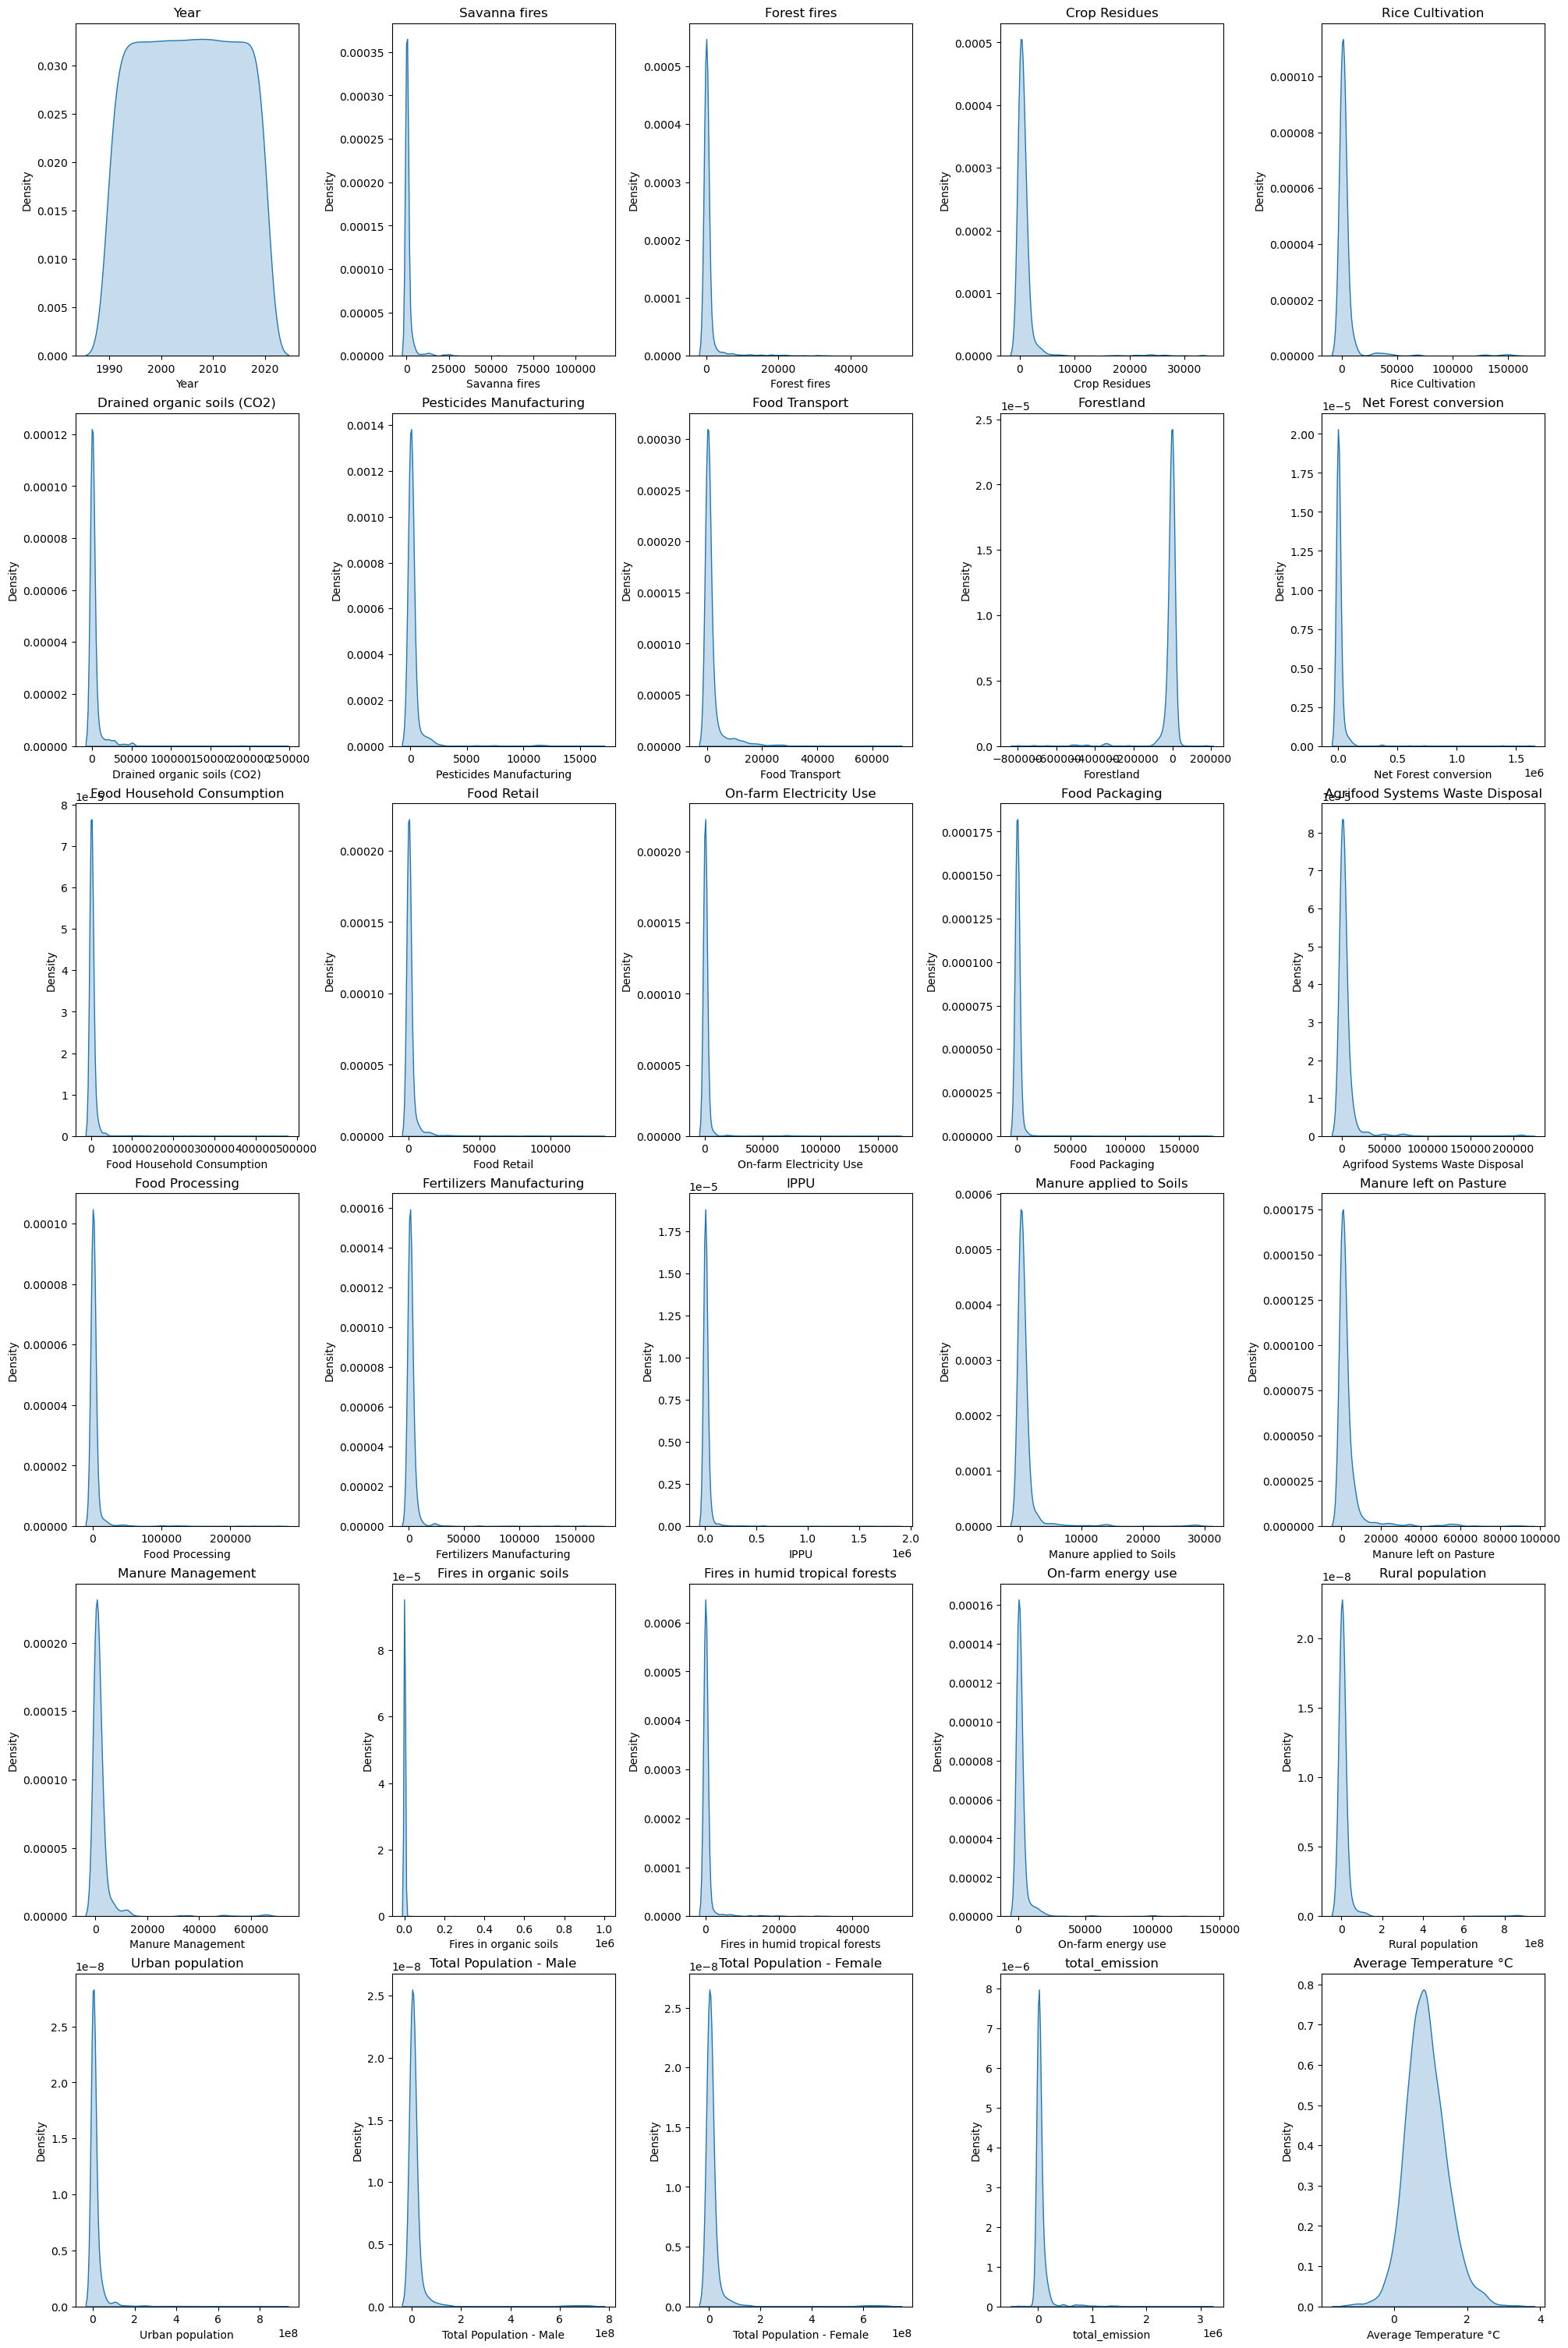

In [12]:
# Select numeric columns for plotting

numeric_columns = df_new.select_dtypes(include='number').columns


# Grid configuration for 5 plots per row

num_columns = len(numeric_columns)

rows = (num_columns + 4) // 5  # Calculate required rows

cols = 5


# Create the subplots

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows), constrained_layout=True)

axes = axes.flatten()


# Plot KDE for each numeric column

for i, column in enumerate(numeric_columns):

    sns.kdeplot(df_new[column], ax=axes[i], fill=True)

    axes[i].set_title(column)


# Turn off unused axes

for j in range(len(numeric_columns), len(axes)):

    axes[j].axis('off')


# Show the plots

plt.show()

#### Multivariate Analysis

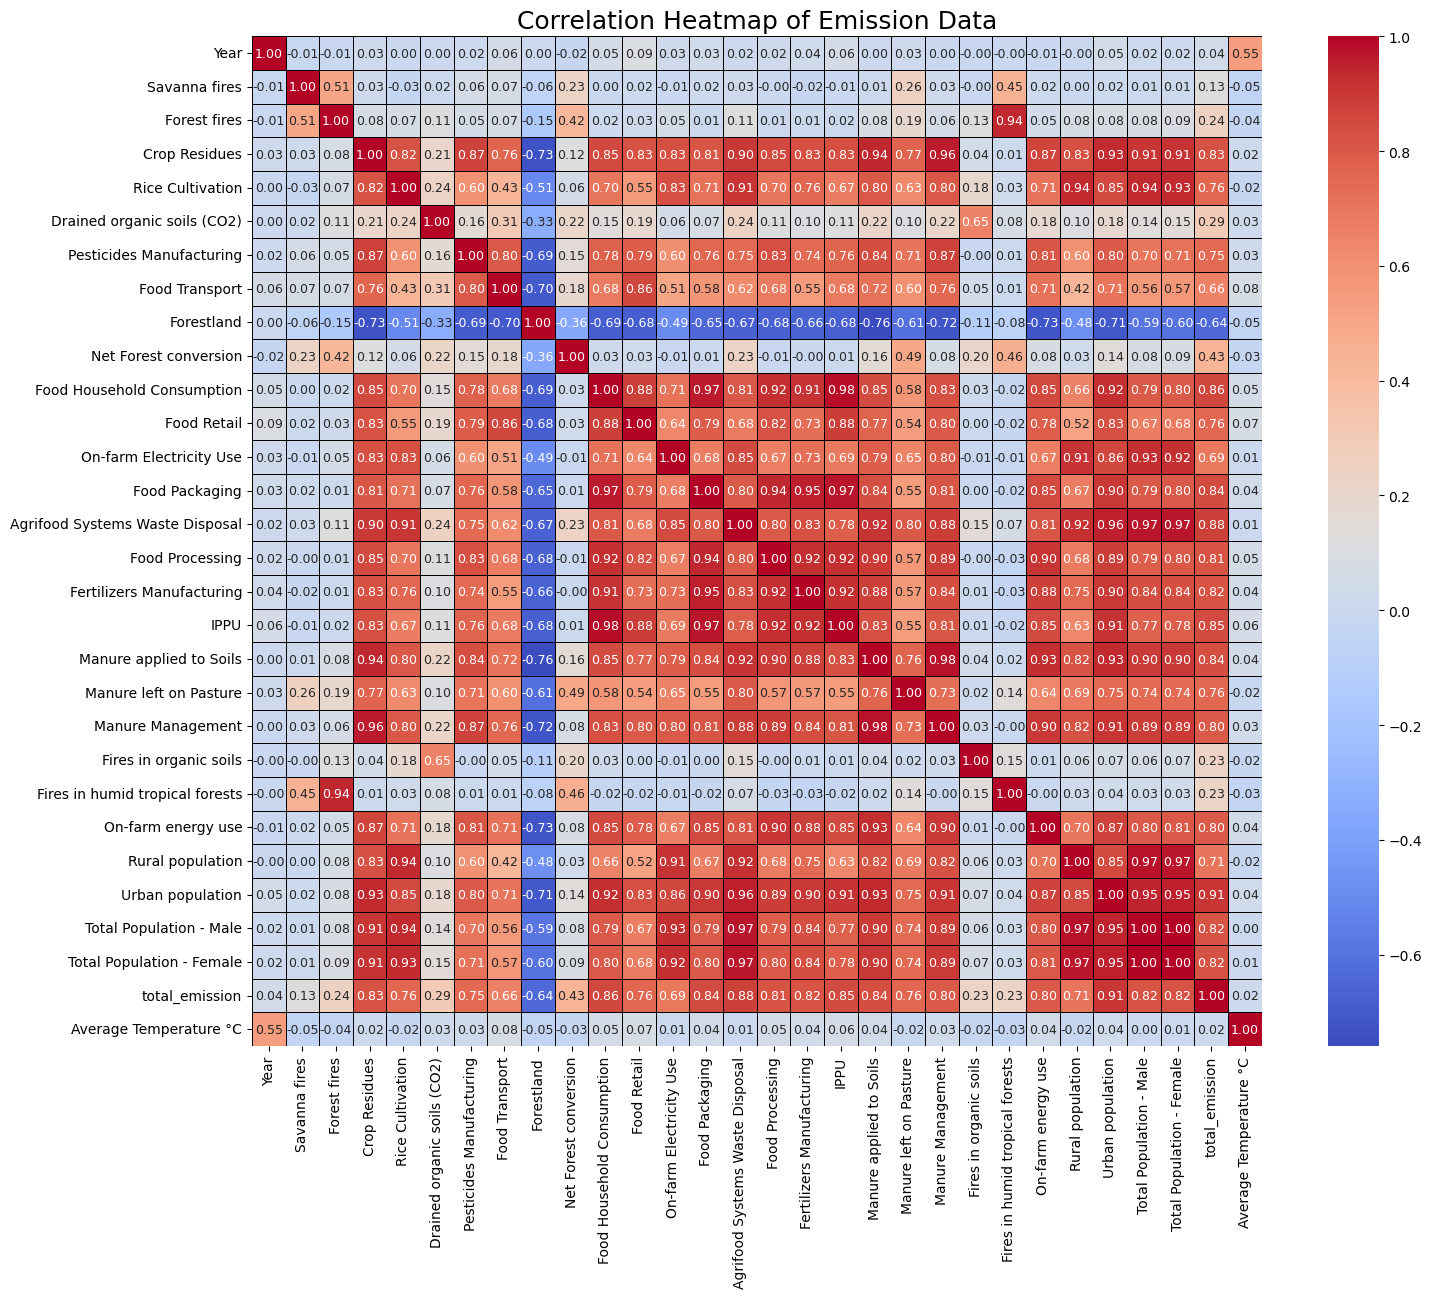

In [34]:
df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the figure size for better clarity
plt.figure(figsize=(16, 13))

# Plot the heatmap without clustering
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True,
            linewidths=0.5, linecolor='black', square=True, annot_kws={'size': 9})

# Adjust title and show plot
plt.title('Correlation Heatmap of Emission Data', fontsize=18)

# Adjust the layout for better spacing of the labels
plt.tight_layout()

plt.show()

#### Scatterplots for highest correlation with  Average Temperature

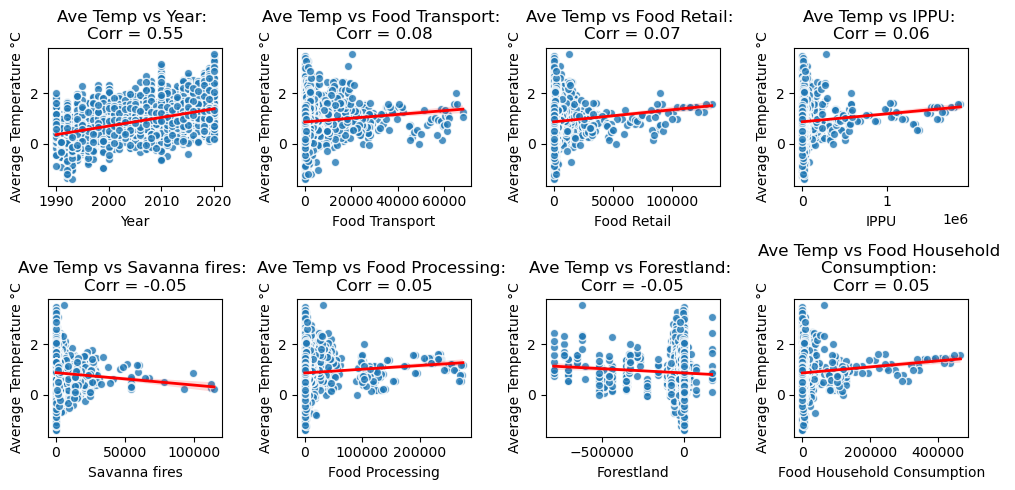

In [53]:
# Create 2x4 subplots
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

# First scatterplot
correlation1 = df_numeric['Year'].corr(df_numeric['Average Temperature °C'])
sns.regplot(x=df_numeric['Year'], y=df_numeric['Average Temperature °C'], ax=axes[0, 0], scatter_kws={'edgecolor': 'white'}, line_kws={'color': 'red', 'linewidth': 2})
axes[0, 0].set_title(f'Ave Temp vs Year: \nCorr = {correlation1:.2f}')

# Second scatterplot
correlation2 = df_numeric['Food Transport'].corr(df_numeric['Average Temperature °C'])
sns.regplot(x=df_numeric['Food Transport'], y=df_numeric['Average Temperature °C'], ax=axes[0, 1],scatter_kws={'edgecolor': 'white'}, line_kws={'color': 'red', 'linewidth': 2})
axes[0, 1].set_title(f'Ave Temp vs Food Transport: \nCorr = {correlation2:.2f}')

# Third scatterplot
correlation3 = df_numeric['Food Retail'].corr(df_numeric['Average Temperature °C'])
sns.regplot(x=df_numeric['Food Retail'], y=df_numeric['Average Temperature °C'], ax=axes[0, 2], scatter_kws={'edgecolor': 'white'}, line_kws={'color': 'red', 'linewidth': 2})
axes[0, 2].set_title(f'Ave Temp vs Food Retail: \nCorr = {correlation3:.2f}')

# Fourth scatterplot
correlation4 = df_numeric['IPPU'].corr(df_numeric['Average Temperature °C'])
sns.regplot(x=df_numeric['IPPU'], y=df_numeric['Average Temperature °C'], ax=axes[0, 3], scatter_kws={'edgecolor': 'white'}, line_kws={'color': 'red', 'linewidth': 2})
axes[0, 3].set_title(f'Ave Temp vs IPPU: \nCorr = {correlation4:.2f}')

# Fifth scatterplot
correlation5 = df_numeric['Savanna fires'].corr(df_numeric['Average Temperature °C'])
sns.regplot(x=df_numeric['Savanna fires'], y=df_numeric['Average Temperature °C'], ax=axes[1, 0], scatter_kws={'edgecolor': 'white'}, line_kws={'color': 'red', 'linewidth': 2})
axes[1, 0].set_title(f'Ave Temp vs Savanna fires: \nCorr = {correlation5:.2f}')

# Sixth scatterplot
correlation6 = df_numeric['Food Processing'].corr(df_numeric['Average Temperature °C'])
sns.regplot(x=df_numeric['Food Processing'], y=df_numeric['Average Temperature °C'], ax=axes[1, 1], scatter_kws={'edgecolor': 'white'}, line_kws={'color': 'red', 'linewidth': 2})
axes[1, 1].set_title(f'Ave Temp vs Food Processing: \nCorr = {correlation6:.2f}')

# Seventh scatterplot
correlation7 = df_numeric['Forestland'].corr(df_numeric['Average Temperature °C'])
sns.regplot(x=df_numeric['Forestland'], y=df_numeric['Average Temperature °C'], ax=axes[1, 2], scatter_kws={'edgecolor': 'white'}, line_kws={'color': 'red', 'linewidth': 2})
axes[1, 2].set_title(f'Ave Temp vs Forestland: \nCorr = {correlation7:.2f}')

# Eighth scatterplot
correlation8 = df_numeric['Food Household Consumption'].corr(df_numeric['Average Temperature °C'])
sns.regplot(x=df_numeric['Food Household Consumption'], y=df_numeric['Average Temperature °C'], ax=axes[1, 3], scatter_kws={'edgecolor': 'white'}, line_kws={'color': 'red', 'linewidth': 2})
axes[1, 3].set_title(f'Ave Temp vs Food Household \nConsumption: \nCorr = {correlation8:.2f}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### **6.Feature Selection**

### **7.Splitting Data into Training and Test Sets**

### **8.Model Training**

### **9.Model Evaluation**

### **10.Conclusion**